In [19]:
import pandas as pd
from sklearn.linear_model import SGDClassifier
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import sys
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


# Εισαγωγή δεδομένων με βιβλιοθήκη pandas

In [20]:
data = pd.read_csv('C:/Users/athanasis/Desktop/AI-Master/..A..Semester/Machine Learning/Tasks/exer1/day.csv',sep=",")
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# Δημιουργία πίνακα με τα 3 numeric columns και διαχωρισμός δεδομένων σε few και many

Η υλοποίηση γίνεται με την χρήση των τριών στηλών που μας παρέχουν τα numeric δεδομένα. Επίσης γίνεται και "rename" στα data δημιουργώντας δυο κλάσεις. Τέλος με την βιβλιοθήκη από το sklearn προετοιμάζουμε τα data σε train & test.

In [21]:
ndata = data[['temp','windspeed','hum']]
X = data[['temp']]
labels=['few','many']
labdata = pd.cut(data['cnt'], bins=2, labels=labels)
X_train, X_test, y_train, y_test = train_test_split(ndata, labdata, test_size=0.30)

# Χρήση Logistic Regression από τις βιβλιοθήκες sklearn

Το default penalty είναι default='l2'. Το default regulization στο logistic regression είναι C=1.0, όπου αυτό χρησιμοποιώ στην
παρακάτω υλοποίηση.

In [22]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Prediction των δεδομένων που εχουμε για test και μέτρηση του Accuracy.

In [23]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set:',metrics.accuracy_score(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.8181818181818182


In [24]:
print(y_pred)

['few' 'few' 'many' 'many' 'few' 'few' 'few' 'many' 'few' 'many' 'many'
 'many' 'few' 'few' 'many' 'few' 'few' 'few' 'many' 'few' 'many' 'many'
 'many' 'many' 'few' 'many' 'many' 'few' 'few' 'few' 'many' 'few' 'many'
 'many' 'many' 'few' 'many' 'many' 'many' 'many' 'few' 'many' 'many'
 'many' 'many' 'many' 'few' 'few' 'few' 'few' 'few' 'few' 'few' 'many'
 'many' 'many' 'many' 'many' 'few' 'many' 'many' 'many' 'many' 'many'
 'many' 'few' 'few' 'many' 'few' 'few' 'few' 'many' 'few' 'many' 'many'
 'few' 'few' 'few' 'many' 'many' 'many' 'few' 'many' 'many' 'few' 'many'
 'few' 'many' 'few' 'many' 'many' 'many' 'many' 'many' 'few' 'many' 'few'
 'few' 'many' 'few' 'many' 'many' 'few' 'few' 'many' 'many' 'few' 'few'
 'many' 'many' 'few' 'many' 'many' 'few' 'few' 'few' 'few' 'many' 'many'
 'few' 'many' 'few' 'few' 'few' 'many' 'few' 'many' 'many' 'few' 'many'
 'few' 'few' 'few' 'many' 'few' 'many' 'many' 'few' 'few' 'many' 'many'
 'few' 'many' 'many' 'many' 'many' 'few' 'many' 'few' 'few' 'many

# Prediction με Stochastic Gradient Descent
Το loss='log' δίνει το logistic regression αλγόριθμο. Το max_iter=1 σημαίνει ότι ο αλγόριθμος θα περάσει από το τα training data μόνο μια φορά Το random_state αν δεν οριστεί τότε παίρνει σαν default τιμή το αποτέλεσμα της μεθόδου np.random Τέλος αν δεν ορίσουμε εμείς το learning rate παίρνει το 'optimal'

In [25]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

learning_rate = 2
n = 1 ;# number of instances to keep
fX = X[:n].values
fy = labdata[:n].values
sgd = SGDClassifier(loss="log", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                     average=False, random_state=87, verbose=1)

# Υπολογισμός του loss για 15 εποχες 

To partial_fit παίρνει τα data ανά  batch και δεν βάζει όλα τα data μαζί.
Τέλος παρατηρούμε ότι το loss μειώνετε αρκετά γρήγορα μέχρι την 6 εποχή όπου στις επόμενες αρχίζει να σταθεροποιείται.


In [26]:
p_sum = []

epochs = 15 # number of epochs

for epoch in range(epochs):
    model  = sgd.partial_fit(fX, fy, classes=labels)

    y  = model.predict(fX)
    p  = model.decision_function(fX)
    c  = (1 - np.mean(y == fy))
    p_sum.append(p)
  

    
sys.stdout = old_stdout
loss_history = mystdout.getvalue()

loss_list  = []
use_first = True
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    if use_first:
        loss_list.append(float(line.split("loss: ")[-1]))



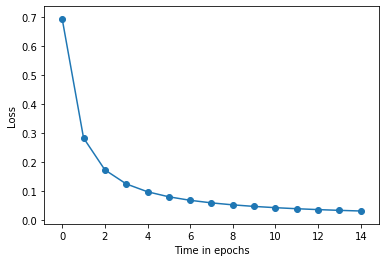

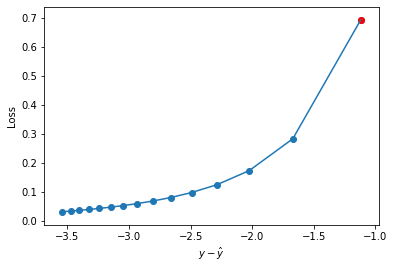

In [27]:

plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()
plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()